# Explore here

In [2559]:
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

url = "https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv"
df = pd.read_csv(url)
df.to_csv("../data/raw/data.csv", index=False)
df.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2


In [2560]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Data columns (total 108 columns):
 #    Column                                                                         Dtype  
---   ------                                                                         -----  
 0    fips                                                                           int64  
 1    TOT_POP                                                                        int64  
 2    0-9                                                                            int64  
 3    0-9 y/o % of total pop                                                         float64
 4    19-Oct                                                                         int64  
 5    10-19 y/o % of total pop                                                       float64
 6    20-29                                                                          int64  
 7    20-29 y/o % of total pop                         

In [2561]:
columnas_a_eliminar = df.filter(regex="^[0-9]+-[0-9]+").columns.tolist()  # Elimina las columnas de edades específicas
columnas_a_eliminar.extend(["TOT_POP", "19-Oct", "80+", "80+ y/o % of total pop"])  # Agregar otras columnas

df_fil = df.drop(columns=columnas_a_eliminar, errors="ignore")
df_fil

,fips,White-alone pop,% White-alone,Black-alone pop,% Black-alone,Native American/American Indian-alone pop,% NA/AI-alone,Asian-alone pop,% Asian-alone,Hawaiian/Pacific Islander-alone pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,42660,76.725239,10915,19.630942,267,0.480207,681,1.224798,62,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,190301,87.285228,19492,8.940382,1684,0.772399,2508,1.150343,146,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,12209,49.069571,12042,48.398376,164,0.659137,113,0.454162,46,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,17211,76.834821,4770,21.294643,98,0.437500,53,0.236607,26,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,55456,95.878285,950,1.642462,378,0.653527,185,0.319848,70,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3135,56037,40397,93.835219,592,1.375113,665,1.544680,435,1.010429,68,...,2098,8.9,8.3,9.6,2834,2.6,2.4,2.8,821,5
3136,56039,21971,95.190850,175,0.758199,211,0.914172,326,1.412417,35,...,928,7.2,6.5,8.0,1360,2.4,2.2,2.6,447,5
3137,56041,19356,95.354451,168,0.827627,288,1.418789,96,0.472930,30,...,1163,10.4,9.5,11.2,1500,3.0,2.8,3.2,430,5
3138,56043,7450,94.483196,40,0.507292,143,1.813570,65,0.824350,8,...,506,11.3,10.3,12.1,686,3.4,3.2,3.7,207,6


In [2562]:
df["White_Pop"] = df["White-alone pop"]
df["Black_Pop"] = df["Black-alone pop"]
df["Native_Pop"] = df["Native American/American Indian-alone pop"]
df["Asian_Pop"] = df["Asian-alone pop"]
df["Hawaiian_Pop"] = df["Hawaiian/Pacific Islander-alone pop"]
df["Mixed_Pop"] = df["Two or more races pop"]
df["White_Pop_Percent"] = df["% White-alone"]
df["Black_Pop_Percent"] = df["% Black-alone"]
df["Native_Pop_Percent"] = df["% NA/AI-alone"]
df["Asian_Pop_Percent"] = df["% Asian-alone"]
df["Hawaiian_Pop_Percent"] = df["% Hawaiian/PI-alone"]
df["Mixed_Pop_Percent"] = df["% Two or more races"]
df["Total_Population"] = df["POP_ESTIMATE_2018"]
df["Population_Change"] = df["N_POP_CHG_2018"]
df["Group_Quarters_Estimates"] = df["GQ_ESTIMATES_2018"]
df["Birth_Rate"] = df["R_birth_2018"]
df["Death_Rate"] = df["R_death_2018"]
df["Natural_Increase"] = df["R_NATURAL_INC_2018"]
df["International_Migration"] = df["R_INTERNATIONAL_MIG_2018"]
df["Domestic_Migration"] = df["R_DOMESTIC_MIG_2018"]
df["Net_Migration"] = df["R_NET_MIG_2018"]
df["No_High_School"] = df["Less than a high school diploma 2014-18"]
df["High_School_Only"] = df["High school diploma only 2014-18"]
df["Some_College"] = df["Some college or associate's degree 2014-18"]
df["Bachelor_or_Higher"] = df["Bachelor's degree or higher 2014-18"]
df

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,Birth_Rate,Death_Rate,Natural_Increase,International_Migration,Domestic_Migration,Net_Migration,No_High_School,High_School_Only,Some_College,Bachelor_or_Higher
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,11.8,9.6,2.2,0.0,0.7,0.6,4204,12119,10552,10291
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,10.5,10.3,0.1,0.5,24.3,24.8,14310,40579,46025,46075
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,10.4,12.9,-2.5,0.5,-9.1,-8.6,4901,6486,4566,2220
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,11.1,11.4,-0.3,0.4,-7.0,-6.6,2650,7471,3846,1813
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,11.8,11.4,0.3,0.1,-0.2,0.0,7861,13489,13267,5010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3135,56037,43051,6104,14.178532,6326,14.694200,5359,12.448027,6577,15.277229,...,12.6,7.0,5.6,1.4,-18.5,-17.2,2549,9433,10108,6243
3136,56039,23081,2384,10.328842,2185,9.466661,2967,12.854729,4093,17.733200,...,9.9,3.2,6.7,1.6,-16.2,-14.5,958,2272,4087,9847
3137,56041,20299,3121,15.375142,3205,15.788955,2153,10.606434,2702,13.311001,...,13.5,7.2,6.3,0.0,-14.0,-14.1,934,5176,4810,1995
3138,56043,7885,858,10.881420,1113,14.115409,715,9.067850,903,11.452124,...,9.3,10.7,-1.4,-0.6,-16.6,-17.2,590,1717,2135,1220


In [2563]:
df["Labor_Force"] = df["Civilian_labor_force_2018"]
df["Employed"] = df["Employed_2018"]
df["Unemployed"] = df["Unemployed_2018"]
df["Unemployment_Rate"] = df["Unemployment_rate_2018"]
df["Median_Income"] = df["Median_Household_Income_2018"]
df["Income_Percent_State"] = df["Med_HH_Income_Percent_of_State_Total_2018"]
df["Total_Physicians"] = df["Total Active Patient Care Physicians per 100000 Population 2018 (AAMC)"]
df["Primary_Care_Physicians"] = df["Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC)"]
df["General_Surgeons"] = df["Active Patient Care General Surgeons per 100000 Population 2018 (AAMC)"]
df["Nurse_Practitioners"] = df["Total nurse practitioners (2019)"]
df["Physician_Assistants"] = df["Total physician assistants (2019)"]
df["Total_Hospitals"] = df["Total Hospitals (2019)"]
df["ICU_Beds"] = df["ICU Beds_x"]
df["Total_Population"] = df["Total Population"]
df["Senior_Population"] = df["Population Aged 60+"]
df["Senior_Percent"] = df["Percent of Population Aged 60+"]
df["County"] = df["COUNTY_NAME"]
df["State"] = df["STATE_NAME"]
df["State_FIPS"] = df["STATE_FIPS"]
df["County_FIPS"] = df["CNTY_FIPS"]
df["Urban_Rural_Code"] = df["Urban_rural_code"]
df["AnyCondition_Prevalence"] = df["anycondition_prevalence"]
df["Obesity_Prevalence"] = df["Obesity_prevalence"]
df["HeartDisease_Prevalence"] = df["Heart disease_prevalence"]
df["COPD_Prevalence"] = df["COPD_prevalence"]
df["Diabetes_Prevalence"] = df["diabetes_prevalence"]
df["CKD_Prevalence"] = df["CKD_prevalence"]
df["Obesity_CI_Lower"] = df["Obesity_Lower 95% CI"]
df["Obesity_CI_Upper"] = df["Obesity_Upper 95% CI"]
df["HeartDisease_CI_Lower"] = df["Heart disease_Lower 95% CI"]
df["HeartDisease_CI_Upper"] = df["Heart disease_Upper 95% CI"]
df["COPD_CI_Lower"] = df["COPD_Lower 95% CI"]
df["COPD_CI_Upper"] = df["COPD_Upper 95% CI"]
df["Diabetes_CI_Lower"] = df["diabetes_Lower 95% CI"]
df["Diabetes_CI_Upper"] = df["diabetes_Upper 95% CI"]
df["CKD_CI_Lower"] = df["CKD_Lower 95% CI"]
df["CKD_CI_Upper"] = df["CKD_Upper 95% CI"]
df["Total_Poverty"] = df["POVALL_2018"]
df["Overall_Poverty_Percent"] = df["PCTPOVALL_2018"]
df["Child_Poverty_0_17_Percent"] = df["PCTPOV017_2018"]
df["Child_Poverty_5_17_Percent"] = df["PCTPOV517_2018"]
df["Median_Household_Income"] = df["MEDHHINC_2018"]
df["Income_Confidence_Lower"] = df["CI90LBINC_2018"]
df["Income_Confidence_Upper"] = df["CI90UBINC_2018"]
df

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,Diabetes_CI_Upper,CKD_CI_Lower,CKD_CI_Upper,Total_Poverty,Overall_Poverty_Percent,Child_Poverty_0_17_Percent,Child_Poverty_5_17_Percent,Median_Household_Income,Income_Confidence_Lower,Income_Confidence_Upper
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,13.8,2.9,3.3,7587,13.8,19.3,19.5,59338,53628,65048
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,13.1,3.0,3.5,21069,9.8,13.9,13.1,57588,54437,60739
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,20.6,4.2,4.8,6788,30.9,43.9,36.7,34382,31157,37607
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,14.9,3.1,3.6,4400,21.8,27.8,26.3,46064,41283,50845
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,14.5,3.2,3.7,7527,13.2,18.0,15.5,50412,46157,54667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3135,56037,43051,6104,14.178532,6326,14.694200,5359,12.448027,6577,15.277229,...,9.6,2.4,2.8,3540,8.4,10.0,8.5,73315,67141,79489
3136,56039,23081,2384,10.328842,2185,9.466661,2967,12.854729,4093,17.733200,...,8.0,2.2,2.6,1443,6.3,6.7,5.9,99087,88142,110032
3137,56041,20299,3121,15.375142,3205,15.788955,2153,10.606434,2702,13.311001,...,11.2,2.8,3.2,2010,10.0,12.1,10.6,63401,56812,69990
3138,56043,7885,858,10.881420,1113,14.115409,715,9.067850,903,11.452124,...,12.1,3.2,3.7,918,11.9,16.1,14.5,55190,49263,61117


In [2564]:
columnas_a_eliminar = [
    "White-alone pop", "% White-alone", "Black-alone pop", "% Black-alone",
    "Native American/American Indian-alone pop", "% NA/AI-alone",
    "Asian-alone pop", "% Asian-alone", "Hawaiian/Pacific Islander-alone pop",
    "% Hawaiian/PI-alone", "Two or more races pop", "% Two or more races",
    "POP_ESTIMATE_2018", "N_POP_CHG_2018", "GQ_ESTIMATES_2018",
    "R_birth_2018", "R_death_2018", "R_NATURAL_INC_2018",
    "R_INTERNATIONAL_MIG_2018", "R_DOMESTIC_MIG_2018", "R_NET_MIG_2018",
    "Less than a high school diploma 2014-18", "High school diploma only 2014-18",
    "Some college or associate's degree 2014-18", "Bachelor's degree or higher 2014-18",
    "Percent of adults with less than a high school diploma 2014-18",
    "Percent of adults with a high school diploma only 2014-18",
    "Percent of adults completing some college or associate's degree 2014-18",
    "Percent of adults with a bachelor's degree or higher 2014-18",
    "POVALL_2018", "PCTPOVALL_2018", "PCTPOV017_2018", "PCTPOV517_2018",
    "MEDHHINC_2018", "CI90LBINC_2018", "CI90UBINC_2018"
]

df = df.drop(columns=columnas_a_eliminar, errors="ignore")


In [2565]:
columnas_a_eliminar = [
    "Civilian_labor_force_2018", "Employed_2018", "Unemployed_2018",
    "Unemployment_rate_2018", "Median_Household_Income_2018",
    "Med_HH_Income_Percent_of_State_Total_2018",
    "Active Physicians per 100000 Population 2018 (AAMC)",
    "Total Active Patient Care Physicians per 100000 Population 2018 (AAMC)",
    "Active Primary Care Physicians per 100000 Population 2018 (AAMC)",
    "Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC)",
    "Active General Surgeons per 100000 Population 2018 (AAMC)",
    "Active Patient Care General Surgeons per 100000 Population 2018 (AAMC)",
    "Total nurse practitioners (2019)", "Total physician assistants (2019)",
    "Total Hospitals (2019)", "Internal Medicine Primary Care (2019)",
    "Family Medicine/General Practice Primary Care (2019)",
    "Total Specialist Physicians (2019)", "ICU Beds_x", "Total Population",
    "Population Aged 60+", "Percent of Population Aged 60+", "COUNTY_NAME",
    "STATE_NAME", "STATE_FIPS", "CNTY_FIPS", "county_pop2018_18 and older",
    "anycondition_prevalence", "anycondition_Lower 95% CI",
    "anycondition_Upper 95% CI", "anycondition_number",
    "Obesity_prevalence", "Obesity_Lower 95% CI", "Obesity_Upper 95% CI",
    "Obesity_number", "Heart disease_prevalence",
    "Heart disease_Lower 95% CI", "Heart disease_Upper 95% CI",
    "Heart disease_number", "COPD_prevalence", "COPD_Lower 95% CI",
    "COPD_Upper 95% CI", "COPD_number", "diabetes_prevalence",
    "diabetes_Lower 95% CI", "diabetes_Upper 95% CI", "diabetes_number",
    "CKD_prevalence", "CKD_Lower 95% CI", "CKD_Upper 95% CI", "CKD_number",
    "Urban_rural_code"
]

df = df.drop(columns=columnas_a_eliminar, errors="ignore")
df

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,Diabetes_CI_Upper,CKD_CI_Lower,CKD_CI_Upper,Total_Poverty,Overall_Poverty_Percent,Child_Poverty_0_17_Percent,Child_Poverty_5_17_Percent,Median_Household_Income,Income_Confidence_Lower,Income_Confidence_Upper
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,13.8,2.9,3.3,7587,13.8,19.3,19.5,59338,53628,65048
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,13.1,3.0,3.5,21069,9.8,13.9,13.1,57588,54437,60739
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,20.6,4.2,4.8,6788,30.9,43.9,36.7,34382,31157,37607
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,14.9,3.1,3.6,4400,21.8,27.8,26.3,46064,41283,50845
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,14.5,3.2,3.7,7527,13.2,18.0,15.5,50412,46157,54667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3135,56037,43051,6104,14.178532,6326,14.694200,5359,12.448027,6577,15.277229,...,9.6,2.4,2.8,3540,8.4,10.0,8.5,73315,67141,79489
3136,56039,23081,2384,10.328842,2185,9.466661,2967,12.854729,4093,17.733200,...,8.0,2.2,2.6,1443,6.3,6.7,5.9,99087,88142,110032
3137,56041,20299,3121,15.375142,3205,15.788955,2153,10.606434,2702,13.311001,...,11.2,2.8,3.2,2010,10.0,12.1,10.6,63401,56812,69990
3138,56043,7885,858,10.881420,1113,14.115409,715,9.067850,903,11.452124,...,12.1,3.2,3.7,918,11.9,16.1,14.5,55190,49263,61117


In [2566]:
# Asegurarse de que las columnas existen antes de operar
if all(col in df.columns for col in ["TOT_POP", "19-Oct", "80+", "80+ y/o % of total pop"]):
    
    # Transformaciones corregidas
    df["Total_poblacion"] = df["TOT_POP"]
    df["Edad_0-19"] = df["0-9"] + df["19-Oct"] + (df["10-19 y/o % of total pop"] * df["TOT_POP"] / 100)
    df["Edad_20-39"] = df["20-29"] + df["30-39"] + (df["20-29 y/o % of total pop"] * df["TOT_POP"] / 100)
    df["Edad_40-59"] = df["40-49"] + df["50-59"] + (df["40-49 y/o % of total pop"] * df["TOT_POP"] / 100)
    df["Edad_60-80+"] = df["60-69"] + df["70-79"] + df["80+"] + (df["60-69 y/o % of total pop"] * df["TOT_POP"] / 100)

else:
    print("⚠️ Algunas columnas no existen en el DataFrame. Revisa los nombres con print(df.columns)")
df

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,Child_Poverty_0_17_Percent,Child_Poverty_5_17_Percent,Median_Household_Income,Income_Confidence_Lower,Income_Confidence_Upper,Total_poblacion,Edad_0-19,Edad_20-39,Edad_40-59,Edad_60-80+
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,19.3,19.5,59338,53628,65048,55601,22060.999999,20845.000000,22902.000001,17716.000001
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,13.9,13.1,57588,54437,60739,218022,78582.999995,72371.000005,84662.000003,90168.000011
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,43.9,36.7,34382,31157,37607,24881,8652.000000,9737.000001,9426.000000,9443.999999
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,27.8,26.3,46064,41283,50845,22400,7647.999999,9171.000000,9191.000000,7597.999999
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,18.0,15.5,50412,46157,54667,57840,22234.999999,20367.999998,22792.000001,21196.000002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3135,56037,43051,6104,14.178532,6326,14.694200,5359,12.448027,6577,15.277229,...,10.0,8.5,73315,67141,79489,43051,18755.999999,17295.000000,15929.000001,13033.000000
3136,56039,23081,2384,10.328842,2185,9.466661,2967,12.854729,4093,17.733200,...,6.7,5.9,99087,88142,110032,23081,6754.000000,10027.000000,9774.000001,7976.000000
3137,56041,20299,3121,15.375142,3205,15.788955,2153,10.606434,2702,13.311001,...,12.1,10.6,63401,56812,69990,20299,9531.000000,7007.999999,7213.999999,6848.000001
3138,56043,7885,858,10.881420,1113,14.115409,715,9.067850,903,11.452124,...,16.1,14.5,55190,49263,61117,7885,3084.000000,2333.000000,2885.000000,3429.000000


In [2567]:
columnas_a_eliminar = df.filter(regex="^[0-9]+-[0-9]+").columns.tolist()  # Elimina las columnas de edades específicas
columnas_a_eliminar.extend(["TOT_POP", "19-Oct", "80+", "80+ y/o % of total pop"])  # Agregar otras columnas

df = df.drop(columns=columnas_a_eliminar, errors="ignore")
df

,fips,White_Pop,Black_Pop,Native_Pop,Asian_Pop,Hawaiian_Pop,Mixed_Pop,White_Pop_Percent,Black_Pop_Percent,Native_Pop_Percent,...,Child_Poverty_0_17_Percent,Child_Poverty_5_17_Percent,Median_Household_Income,Income_Confidence_Lower,Income_Confidence_Upper,Total_poblacion,Edad_0-19,Edad_20-39,Edad_40-59,Edad_60-80+
0,1001,42660,10915,267,681,62,1016,76.725239,19.630942,0.480207,...,19.3,19.5,59338,53628,65048,55601,22060.999999,20845.000000,22902.000001,17716.000001
1,1003,190301,19492,1684,2508,146,3891,87.285228,8.940382,0.772399,...,13.9,13.1,57588,54437,60739,218022,78582.999995,72371.000005,84662.000003,90168.000011
2,1005,12209,12042,164,113,46,307,49.069571,48.398376,0.659137,...,43.9,36.7,34382,31157,37607,24881,8652.000000,9737.000001,9426.000000,9443.999999
3,1007,17211,4770,98,53,26,242,76.834821,21.294643,0.437500,...,27.8,26.3,46064,41283,50845,22400,7647.999999,9171.000000,9191.000000,7597.999999
4,1009,55456,950,378,185,70,801,95.878285,1.642462,0.653527,...,18.0,15.5,50412,46157,54667,57840,22234.999999,20367.999998,22792.000001,21196.000002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3135,56037,40397,592,665,435,68,894,93.835219,1.375113,1.544680,...,10.0,8.5,73315,67141,79489,43051,18755.999999,17295.000000,15929.000001,13033.000000
3136,56039,21971,175,211,326,35,363,95.190850,0.758199,0.914172,...,6.7,5.9,99087,88142,110032,23081,6754.000000,10027.000000,9774.000001,7976.000000
3137,56041,19356,168,288,96,30,361,95.354451,0.827627,1.418789,...,12.1,10.6,63401,56812,69990,20299,9531.000000,7007.999999,7213.999999,6848.000001
3138,56043,7450,40,143,65,8,179,94.483196,0.507292,1.813570,...,16.1,14.5,55190,49263,61117,7885,3084.000000,2333.000000,2885.000000,3429.000000


In [2568]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Data columns (total 74 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   fips                        3140 non-null   int64  
 1   White_Pop                   3140 non-null   int64  
 2   Black_Pop                   3140 non-null   int64  
 3   Native_Pop                  3140 non-null   int64  
 4   Asian_Pop                   3140 non-null   int64  
 5   Hawaiian_Pop                3140 non-null   int64  
 6   Mixed_Pop                   3140 non-null   int64  
 7   White_Pop_Percent           3140 non-null   float64
 8   Black_Pop_Percent           3140 non-null   float64
 9   Native_Pop_Percent          3140 non-null   float64
 10  Asian_Pop_Percent           3140 non-null   float64
 11  Hawaiian_Pop_Percent        3140 non-null   float64
 12  Mixed_Pop_Percent           3140 non-null   float64
 13  Total_Population            3140 

In [2569]:
print(df.isnull().values.any())

False


In [2570]:
df_new = df.drop(columns=["fips", "White_Pop" , "Black_Pop", "Native_Pop", "Asian_Pop", "Hawaiian_Pop", "Mixed_Pop", "White_Pop_Percent", "Black_Pop_Percent", "Native_Pop_Percent", "Asian_Pop_Percent", "Hawaiian_Pop_Percent", "Mixed_Pop_Percent", "County",
                           "State", "State_FIPS", "County_FIPS", "International_Migration", "Domestic_Migration",
                           "No_High_School", "High_School_Only", "Some_College", "Bachelor_or_Higher",
                           "Income_Confidence_Lower", "Income_Confidence_Upper"])
df_new

,Total_Population,Population_Change,Group_Quarters_Estimates,Birth_Rate,Death_Rate,Natural_Increase,Net_Migration,Labor_Force,Employed,Unemployed,...,Total_Poverty,Overall_Poverty_Percent,Child_Poverty_0_17_Percent,Child_Poverty_5_17_Percent,Median_Household_Income,Total_poblacion,Edad_0-19,Edad_20-39,Edad_40-59,Edad_60-80+
0,55036,158,455,11.8,9.6,2.2,0.6,25957,25015,942,...,7587,13.8,19.3,19.5,59338,55601,22060.999999,20845.000000,22902.000001,17716.000001
1,203360,5403,2190,10.5,10.3,0.1,24.8,93849,90456,3393,...,21069,9.8,13.9,13.1,57588,218022,78582.999995,72371.000005,84662.000003,90168.000011
2,26201,-277,2820,10.4,12.9,-2.5,-8.6,8373,7940,433,...,6788,30.9,43.9,36.7,34382,24881,8652.000000,9737.000001,9426.000000,9443.999999
3,22580,-155,2151,11.1,11.4,-0.3,-6.6,8661,8317,344,...,4400,21.8,27.8,26.3,46064,22400,7647.999999,9171.000000,9191.000000,7597.999999
4,57667,13,489,11.8,11.4,0.3,0.0,25006,24128,878,...,7527,13.2,18.0,15.5,50412,57840,22234.999999,20367.999998,22792.000001,21196.000002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3135,44527,-496,660,12.6,7.0,5.6,-17.2,21150,20254,896,...,3540,8.4,10.0,8.5,73315,43051,18755.999999,17295.000000,15929.000001,13033.000000
3136,22923,-180,270,9.9,3.2,6.7,-14.5,15340,14876,464,...,1443,6.3,6.7,5.9,99087,23081,6754.000000,10027.000000,9774.000001,7976.000000
3137,20758,-157,220,13.5,7.2,6.3,-14.1,8931,8541,390,...,2010,10.0,12.1,10.6,63401,20299,9531.000000,7007.999999,7213.999999,6848.000001
3138,8253,-150,140,9.3,10.7,-1.4,-17.2,4058,3886,172,...,918,11.9,16.1,14.5,55190,7885,3084.000000,2333.000000,2885.000000,3429.000000


In [2571]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Data columns (total 49 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Total_Population            3140 non-null   int64  
 1   Population_Change           3140 non-null   int64  
 2   Group_Quarters_Estimates    3140 non-null   int64  
 3   Birth_Rate                  3140 non-null   float64
 4   Death_Rate                  3140 non-null   float64
 5   Natural_Increase            3140 non-null   float64
 6   Net_Migration               3140 non-null   float64
 7   Labor_Force                 3140 non-null   int64  
 8   Employed                    3140 non-null   int64  
 9   Unemployed                  3140 non-null   int64  
 10  Unemployment_Rate           3140 non-null   float64
 11  Median_Income               3140 non-null   int64  
 12  Income_Percent_State        3140 non-null   float64
 13  Total_Physicians            3140 

In [2572]:
columns_to_drop = ["Population_Change", "Group_Quarters_Estimates", "Natural_Increase", "Net_Migration",
                   "Labor_Force", "Employed", "Unemployed", "Unemployment_Rate",
                   "HeartDisease_Prevalence", "COPD_Prevalence", "Diabetes_Prevalence", "CKD_Prevalence",
                   "HeartDisease_CI_Lower", "HeartDisease_CI_Upper", "COPD_CI_Lower", "COPD_CI_Upper",
                   "Diabetes_CI_Lower", "Diabetes_CI_Upper", "CKD_CI_Lower", "CKD_CI_Upper"]

df_new = df_new.drop(columns=columns_to_drop)
df_new


,Total_Population,Birth_Rate,Death_Rate,Median_Income,Income_Percent_State,Total_Physicians,Primary_Care_Physicians,General_Surgeons,Nurse_Practitioners,Physician_Assistants,...,Total_Poverty,Overall_Poverty_Percent,Child_Poverty_0_17_Percent,Child_Poverty_5_17_Percent,Median_Household_Income,Total_poblacion,Edad_0-19,Edad_20-39,Edad_40-59,Edad_60-80+
0,55036,11.8,9.6,59338,119.0,196.7,71.2,6.9,28.859137,6.085786,...,7587,13.8,19.3,19.5,59338,55601,22060.999999,20845.000000,22902.000001,17716.000001
1,203360,10.5,10.3,57588,115.5,196.7,71.2,6.9,113.162114,23.863512,...,21069,9.8,13.9,13.1,57588,218022,78582.999995,72371.000005,84662.000003,90168.000011
2,26201,10.4,12.9,34382,68.9,196.7,71.2,6.9,12.914231,2.723340,...,6788,30.9,43.9,36.7,34382,24881,8652.000000,9737.000001,9426.000000,9443.999999
3,22580,11.1,11.4,46064,92.3,196.7,71.2,6.9,11.626493,2.451783,...,4400,21.8,27.8,26.3,46064,22400,7647.999999,9171.000000,9191.000000,7597.999999
4,57667,11.8,11.4,50412,101.1,196.7,71.2,6.9,30.021267,6.330854,...,7527,13.2,18.0,15.5,50412,57840,22234.999999,20367.999998,22792.000001,21196.000002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3135,44527,12.6,7.0,73315,117.8,199.6,76.2,10.4,21.311749,11.997173,...,3540,8.4,10.0,8.5,73315,43051,18755.999999,17295.000000,15929.000001,13033.000000
3136,22923,9.9,3.2,99087,159.2,199.6,76.2,10.4,11.425901,6.432063,...,1443,6.3,6.7,5.9,99087,23081,6754.000000,10027.000000,9774.000001,7976.000000
3137,20758,13.5,7.2,63401,101.8,199.6,76.2,10.4,10.048714,5.656794,...,2010,10.0,12.1,10.6,63401,20299,9531.000000,7007.999999,7213.999999,6848.000001
3138,8253,9.3,10.7,55190,88.6,199.6,76.2,10.4,3.903350,2.197341,...,918,11.9,16.1,14.5,55190,7885,3084.000000,2333.000000,2885.000000,3429.000000


In [2573]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Total_Population            3140 non-null   int64  
 1   Birth_Rate                  3140 non-null   float64
 2   Death_Rate                  3140 non-null   float64
 3   Median_Income               3140 non-null   int64  
 4   Income_Percent_State        3140 non-null   float64
 5   Total_Physicians            3140 non-null   float64
 6   Primary_Care_Physicians     3140 non-null   float64
 7   General_Surgeons            3140 non-null   float64
 8   Nurse_Practitioners         3140 non-null   float64
 9   Physician_Assistants        3140 non-null   float64
 10  Total_Hospitals             3140 non-null   float64
 11  ICU_Beds                    3140 non-null   int64  
 12  Senior_Population           3140 non-null   int64  
 13  Senior_Percent              3140 

In [2574]:
columns_to_keep = ["Obesity_Prevalence", "Total_Physicians", "Primary_Care_Physicians",
                   "General_Surgeons", "Nurse_Practitioners", "Physician_Assistants",
                   "Total_Hospitals", "ICU_Beds", "Median_Income", "Total_Poverty",
                   "Overall_Poverty_Percent", "Child_Poverty_0_17_Percent", "Child_Poverty_5_17_Percent",
                   "Total_Population", "Senior_Population", "Senior_Percent", "Urban_Rural_Code",
                   "Edad_0-19", "Edad_20-39", "Edad_40-59", "Edad_60-80+"]
df_new = df_new[columns_to_keep]
df_new

,Obesity_Prevalence,Total_Physicians,Primary_Care_Physicians,General_Surgeons,Nurse_Practitioners,Physician_Assistants,Total_Hospitals,ICU_Beds,Median_Income,Total_Poverty,...,Child_Poverty_0_17_Percent,Child_Poverty_5_17_Percent,Total_Population,Senior_Population,Senior_Percent,Urban_Rural_Code,Edad_0-19,Edad_20-39,Edad_40-59,Edad_60-80+
0,35.8,196.7,71.2,6.9,28.859137,6.085786,1.148905,6,59338,7587,...,19.3,19.5,55036,10523,19.1,3,22060.999999,20845.000000,22902.000001,17716.000001
1,29.7,196.7,71.2,6.9,113.162114,23.863512,4.505074,51,57588,21069,...,13.9,13.1,203360,53519,26.3,4,78582.999995,72371.000005,84662.000003,90168.000011
2,40.7,196.7,71.2,6.9,12.914231,2.723340,0.514126,5,34382,6788,...,43.9,36.7,26201,6150,23.5,6,8652.000000,9737.000001,9426.000000,9443.999999
3,38.7,196.7,71.2,6.9,11.626493,2.451783,0.462860,0,46064,4400,...,27.8,26.3,22580,4773,21.1,2,7647.999999,9171.000000,9191.000000,7597.999999
4,34.0,196.7,71.2,6.9,30.021267,6.330854,1.195171,6,50412,7527,...,18.0,15.5,57667,13600,23.6,2,22234.999999,20367.999998,22792.000001,21196.000002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3135,33.6,199.6,76.2,10.4,21.311749,11.997173,2.160982,10,73315,3540,...,10.0,8.5,44527,7015,15.8,5,18755.999999,17295.000000,15929.000001,13033.000000
3136,19.4,199.6,76.2,10.4,11.425901,6.432063,1.158570,6,99087,1443,...,6.7,5.9,22923,4298,18.7,5,6754.000000,10027.000000,9774.000001,7976.000000
3137,34.2,199.6,76.2,10.4,10.048714,5.656794,1.018926,6,63401,2010,...,12.1,10.6,20758,3554,17.1,5,9531.000000,7007.999999,7213.999999,6848.000001
3138,28.4,199.6,76.2,10.4,3.903350,2.197341,0.395794,0,55190,918,...,16.1,14.5,8253,2206,26.7,6,3084.000000,2333.000000,2885.000000,3429.000000


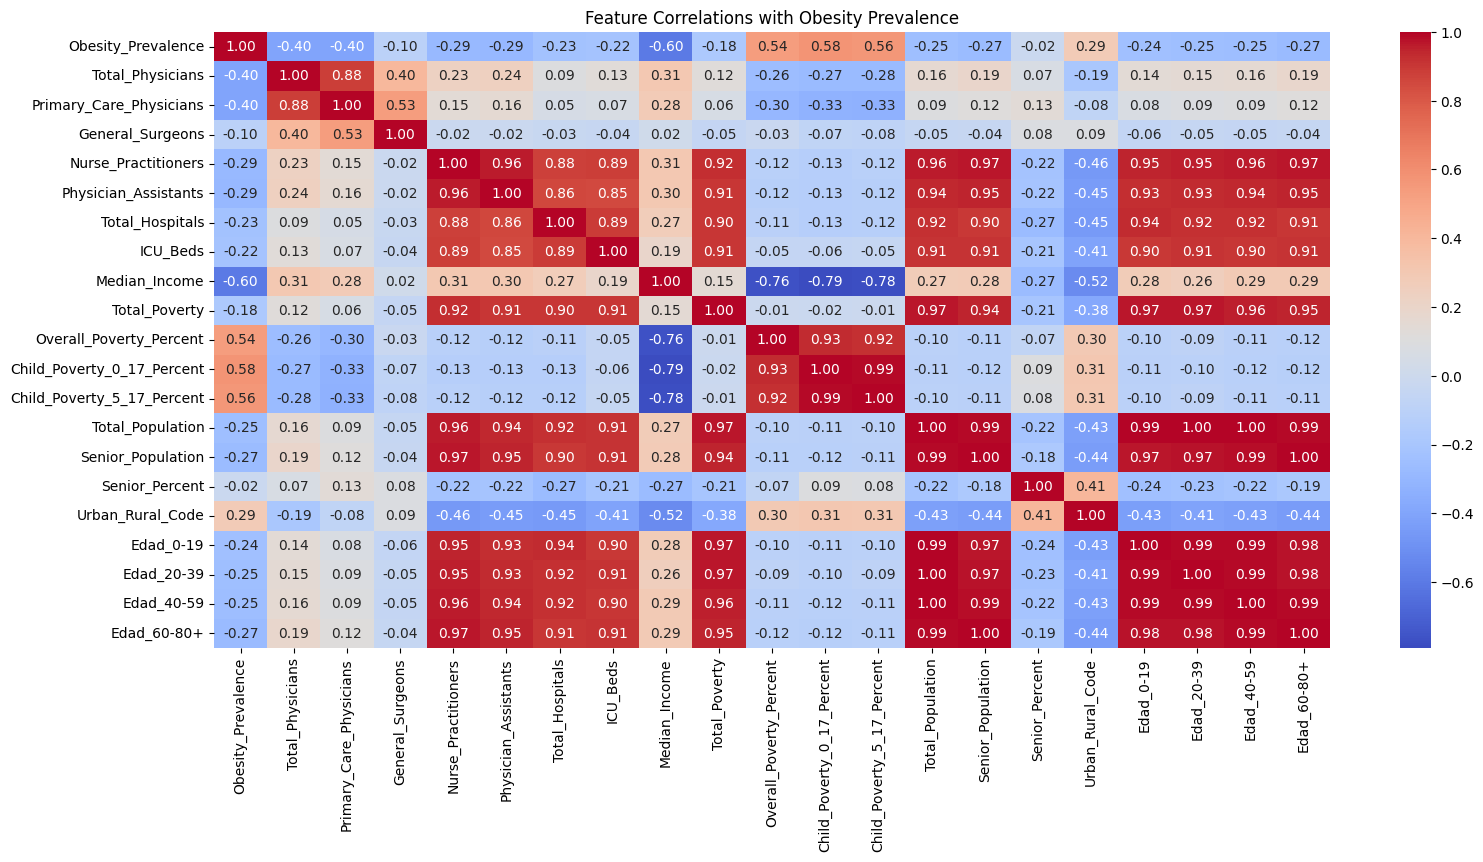

In [2575]:
#Matriz de correlacion
plt.figure(figsize=(18, 8))
sns.heatmap(df_new.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlations with Obesity Prevalence")
plt.show()


In [2576]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Obesity_Prevalence          3140 non-null   float64
 1   Total_Physicians            3140 non-null   float64
 2   Primary_Care_Physicians     3140 non-null   float64
 3   General_Surgeons            3140 non-null   float64
 4   Nurse_Practitioners         3140 non-null   float64
 5   Physician_Assistants        3140 non-null   float64
 6   Total_Hospitals             3140 non-null   float64
 7   ICU_Beds                    3140 non-null   int64  
 8   Median_Income               3140 non-null   int64  
 9   Total_Poverty               3140 non-null   int64  
 10  Overall_Poverty_Percent     3140 non-null   float64
 11  Child_Poverty_0_17_Percent  3140 non-null   float64
 12  Child_Poverty_5_17_Percent  3140 non-null   float64
 13  Total_Population            3140 

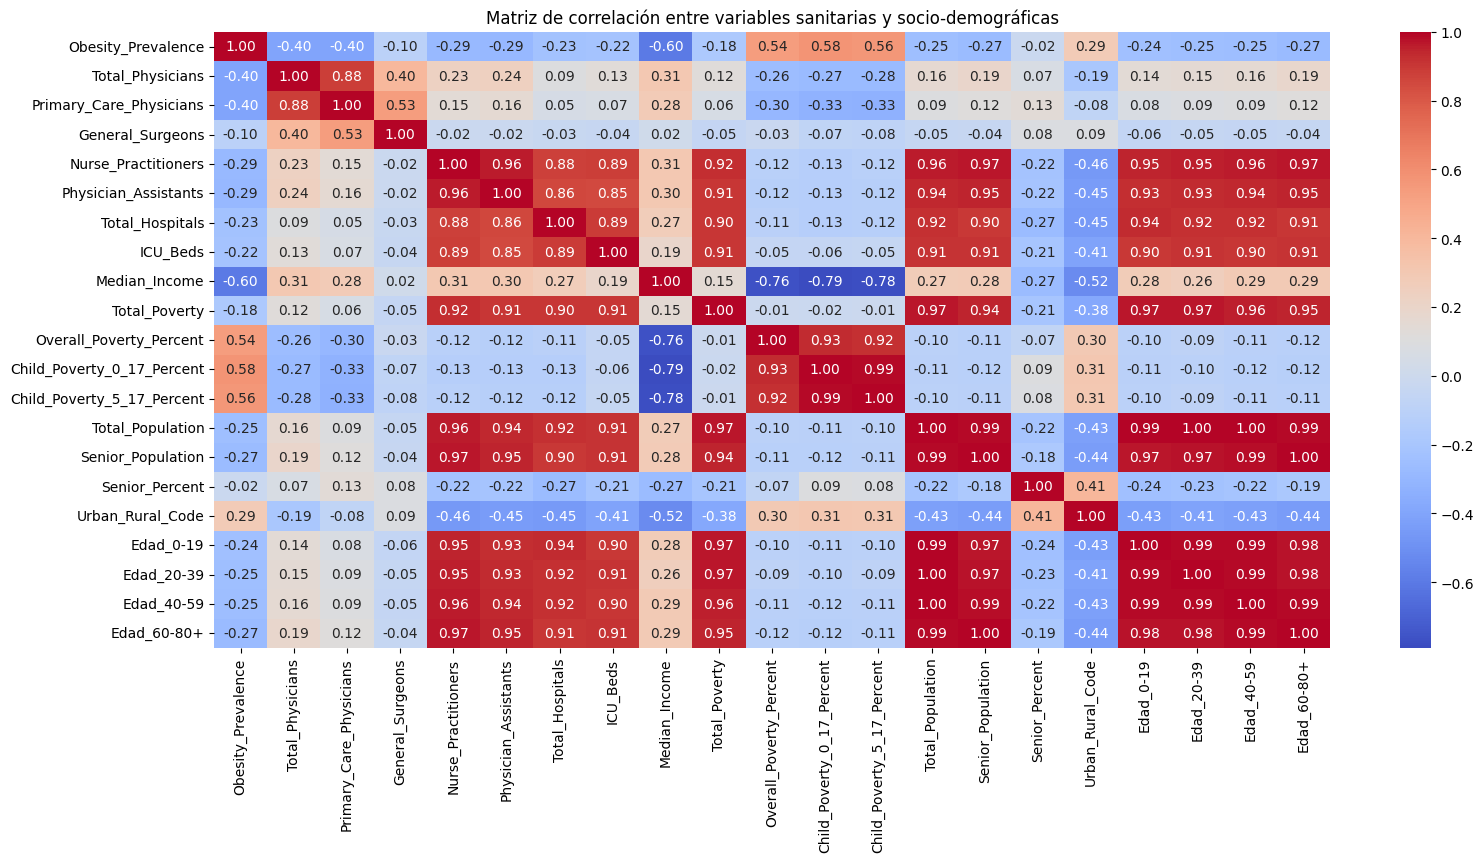

In [2577]:
#ANALIZAR LA CORRELACION ENTRE VARIABLES SANITARIAS Y SOCIO-DEMOGRAFICAS
# Matriz de correlación
plt.figure(figsize=(18, 8))
sns.heatmap(df_new.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlación entre variables sanitarias y socio-demográficas")
plt.show()


R² de regresión lineal: 0.5106


/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18.71149512942793, tolerance: 3.9397184001991055
  model = cd_fast.enet_coordinate_descent_gram(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29.138526410515624, tolerance: 3.9397184001991055
  model = cd_fast.enet_coordinate_descent_gram(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 30.304382123085816, tolerance: 3.9397184001991055
  model = cd_fast.enet_coordinate_descent_gram(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_

R² de Lasso: 0.5106
Mejor alpha encontrado: 0.0026366508987303583


/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.273e+04, tolerance: 5.108e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.815e+00, tolerance: 5.108e+00
  model = cd_fast.enet_coordinate_descent(


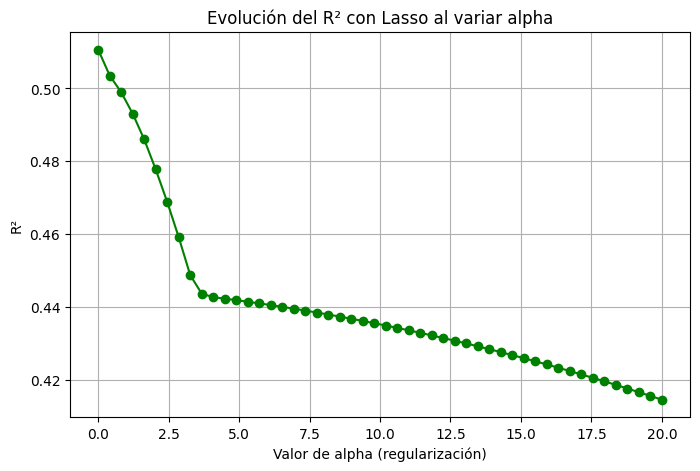

In [2578]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LassoCV
from sklearn.metrics import r2_score

# === CARGA DE DATOS (Asegúrate de haber cargado tu DataFrame como 'df') ===
# Por ejemplo: df = pd.read_csv("nombre_archivo.csv")

# 1. Separar variables predictoras (X) y la variable objetivo (y)
X = df_new.drop("Obesity_Prevalence", axis=1)
y = df_new["Obesity_Prevalence"]

# 2. Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Regresión lineal
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_lr = linear_model.predict(X_test)
r2_linear = r2_score(y_test, y_pred_lr)
print(f"R² de regresión lineal: {r2_linear:.4f}")

# 4. Lasso con validación cruzada
alphas = np.logspace(-3, 1, 20)
lasso_cv = LassoCV(alphas=alphas, cv=5, max_iter=50000)
lasso_cv.fit(X_train, y_train)
y_pred_lasso = lasso_cv.predict(X_test)
r2_lasso = r2_score(y_test, y_pred_lasso)
print(f"R² de Lasso: {r2_lasso:.4f}")
print(f"Mejor alpha encontrado: {lasso_cv.alpha_}")

# 5. Evolución de R² al variar alpha
r2_values = []
alphas_range = np.linspace(0.0, 20.0, 50)

for alpha in alphas_range:
    model = Lasso(alpha=alpha, max_iter=50000)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    r2_values.append(r2)

# 6. Gráfica de R²
plt.figure(figsize=(8, 5))
plt.plot(alphas_range, r2_values, marker='o', linestyle='-', color='green')
plt.xlabel("Valor de alpha (regularización)")
plt.ylabel("R²")
plt.title("Evolución del R² con Lasso al variar alpha")
plt.grid()
plt.show()


In [ ]:
# 1. Obtener los coeficientes del modelo Lasso con mejor alpha
lasso_coef = pd.Series(lasso_cv.coef_, index=X.columns)

# 2. Mostrar los coeficientes eliminados (coef = 0)
coef_eliminados = lasso_coef[lasso_coef == 0]
print("\nVariables eliminadas por Lasso (coef = 0):")
print(coef_eliminados)

# 3. Mostrar los coeficientes no eliminados (importantes)
coef_importantes = lasso_coef[lasso_coef != 0].sort_values(key=abs, ascending=False)
print("\nVariables más importantes según Lasso:")
print(coef_importantes)

# 4. Graficar la importancia de las variables no eliminadas
plt.figure(figsize=(10, 6))
coef_importantes.plot(kind='barh', color='skyblue')
plt.title("Importancia de las variables (coeficientes Lasso)")
plt.xlabel("Valor del coeficiente")
plt.gca().invert_yaxis()
plt.grid(axis='x')
plt.tight_layout()
plt.show()


In [2579]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_regression
import pandas as pd

scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

X = df_new.drop(columns=["Obesity_Prevalence"])
y = df_new["Obesity_Prevalence"]  # Target

k_best = SelectKBest(score_func=f_regression, k=10)
k_best.fit(X, y)

# Get selected feature names
selected_features = X.columns[k_best.get_support()]
print("Características seleccionadas:", selected_features.tolist())


Características seleccionadas: ['Total_Physicians', 'Primary_Care_Physicians', 'Nurse_Practitioners', 'Physician_Assistants', 'Median_Income', 'Overall_Poverty_Percent', 'Child_Poverty_0_17_Percent', 'Child_Poverty_5_17_Percent', 'Urban_Rural_Code', 'Edad_60-80+']


In [2580]:
from sklearn.model_selection import train_test_split

# Crear nuevo DataFrame con solo las características seleccionadas
X_selected_df = df[selected_features]

# División 80%-20%
X_train, X_test, y_train, y_test = train_test_split(X_selected_df, y, test_size=0.2, random_state=42)

print(f"Tamaño de Train: {X_train.shape}, Test: {X_test.shape}")


Tamaño de Train: (2512, 10), Test: (628, 10)


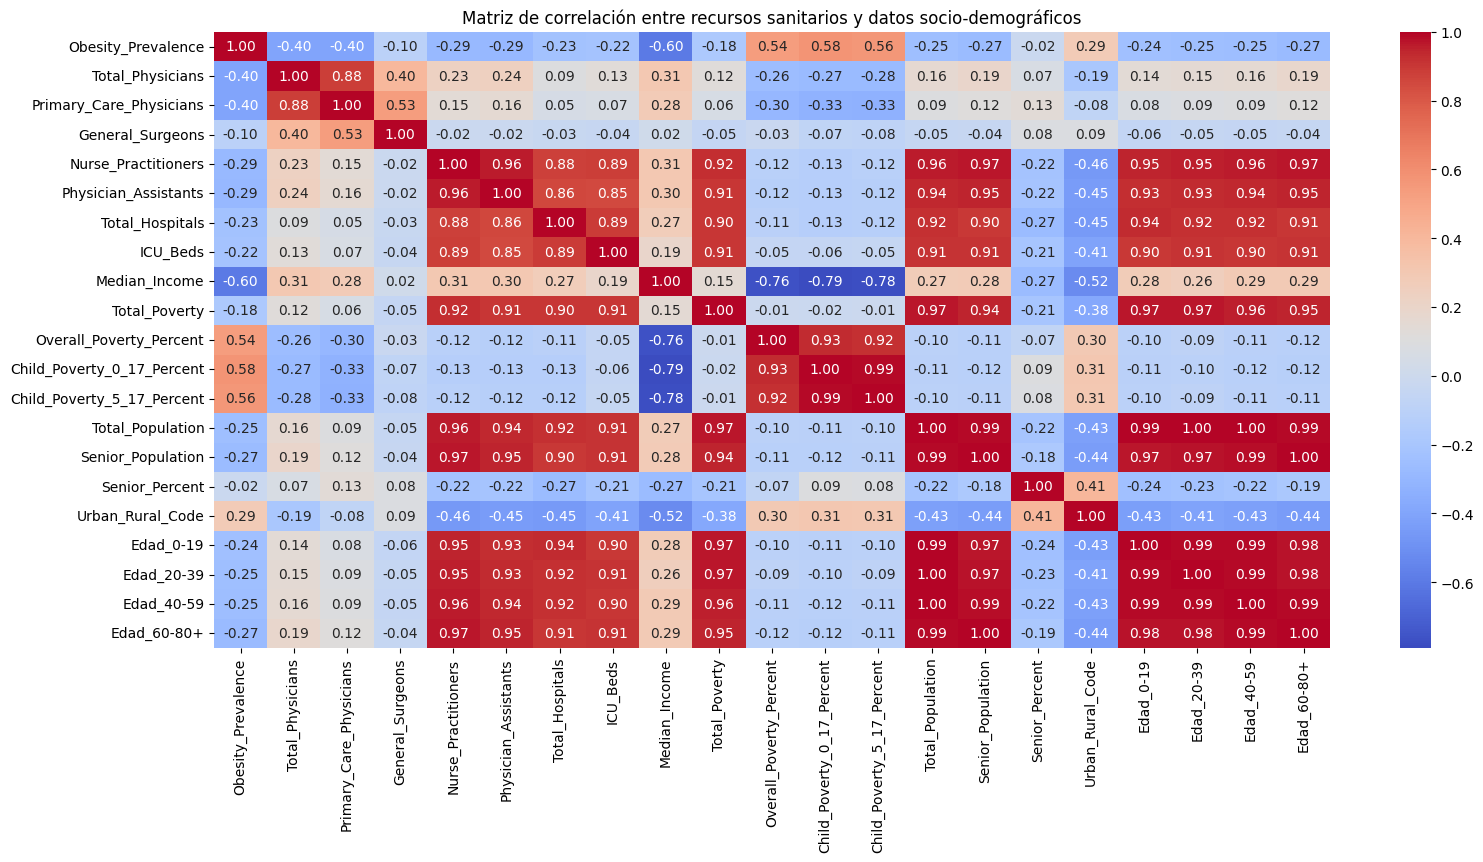

In [2581]:
import seaborn as sns
import matplotlib.pyplot as plt

# Generar matriz de correlación
plt.figure(figsize=(18, 8))
sns.heatmap(df_new.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlación entre recursos sanitarios y datos socio-demográficos")
plt.show()


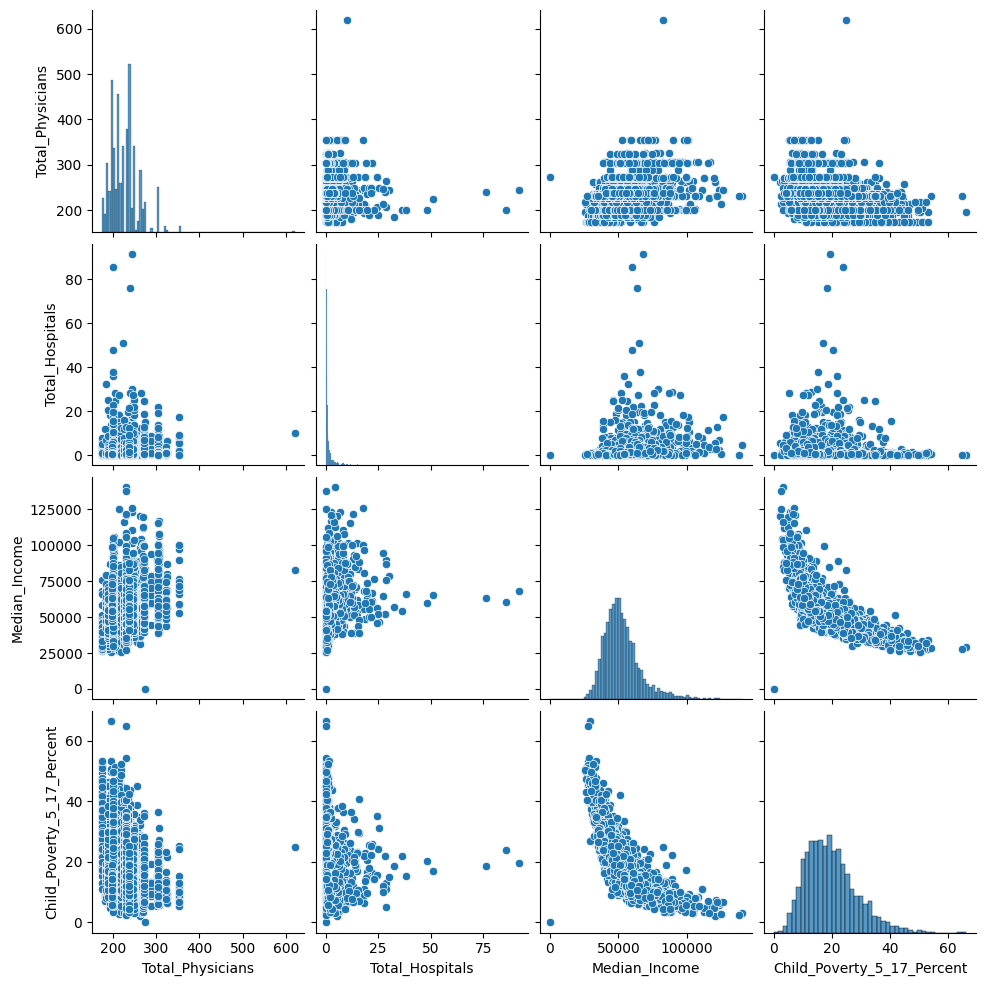

In [2582]:
# Para ver si los recursos sanitarios afectan factores 
# socio-demográficos, podemos graficar relaciones entre variables
sns.pairplot(df, vars=["Total_Physicians", "Total_Hospitals", "Median_Income", "Child_Poverty_5_17_Percent"])
plt.show()

In [2583]:
# Regresion lineal
# Relación lineal entre recursos sanitarios y datos
# socio-demográficos,
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X = df_new[["Total_Physicians", "Total_Hospitals", "ICU_Beds", "Primary_Care_Physicians"]]  # Variables sanitarias
y = df_new["Median_Income"]  # Variable socio-demográfica

# Ajustar modelo
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Evaluar ajuste
r2 = r2_score(y, y_pred)
print(f"R² del modelo: {r2:.4f}")

R² del modelo: 0.1705


In [2584]:
from sklearn.linear_model import LassoCV

lasso = LassoCV(cv=5)
lasso.fit(X, y)
print(f"Mejor alpha encontrado para Lasso: {lasso.alpha_}")

Mejor alpha encontrado para Lasso: 804.1592222480557


R² de Lasso: 0.4501
Mejor alpha encontrado: 0.011288378916846888


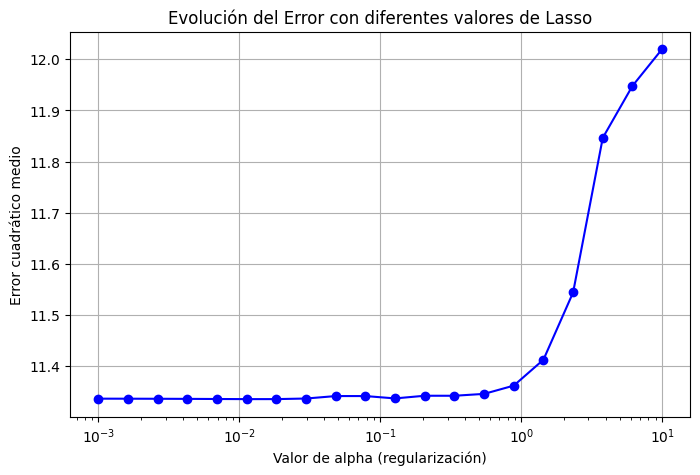

In [2585]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LassoCV
from sklearn.metrics import r2_score

# Definir valores de alpha en un rango amplio
alphas = np.logspace(-3, 1, 20)  # Ajustamos rango entre 0.001 y 10

# Entrenar modelo con validación cruzada para encontrar el mejor alpha
lasso_model = LassoCV(alphas=alphas, cv=5, max_iter=50000)
lasso_model.fit(X_train, y_train)

# Evaluar el mejor modelo encontrado
y_pred = lasso_model.predict(X_test)
r2_lasso = r2_score(y_test, y_pred)
print(f"R² de Lasso: {r2_lasso:.4f}")
print(f"Mejor alpha encontrado: {lasso_model.alpha_}")

# Graficar evolución de error cuadrático medio
plt.figure(figsize=(8, 5))
plt.plot(lasso_model.alphas_, lasso_model.mse_path_.mean(axis=1), marker='o', linestyle='-', color='b')
plt.xscale("log")
plt.xlabel("Valor de alpha (regularización)")
plt.ylabel("Error cuadrático medio")
plt.title("Evolución del Error con diferentes valores de Lasso")
plt.grid()
plt.show()


In [2586]:
print(f"Mejor alpha encontrado: {lasso_model.alpha_}")

Mejor alpha encontrado: 0.011288378916846888
